In [56]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
hit = pd.read_csv('Hitters.csv')
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df['Salary']
X_ = df.drop(['League', 'Division', 'NewLeague', 'Salary'], axis=1).astype('float')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X = preprocessing.StandardScaler().fit(X).transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [57]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=0.1, max_iter=2000).fit(X_train, y_train)

In [58]:
lasso_model

Lasso(alpha=0.1, max_iter=2000)

In [59]:
lasso_model.intercept_, lasso_model.coef_

(537.3780056211142,
 array([-255.28113683,  382.03696081,   56.16504483,  -73.3571177 ,
         -46.85329437,  114.51218731,   35.94474936, -338.81044166,
         -31.04606188,  -15.54868772,  529.0597285 ,  178.1862433 ,
        -167.86513715,   72.86535078,   38.76399958,   -4.53222569,
          56.33342646,  -50.43947439,  -24.38252044]))

c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.221e+03, tolerance: 3.899e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.302e+05, tolerance: 3.899e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.302e+05, toler

Text(0, 0.5, 'weights')

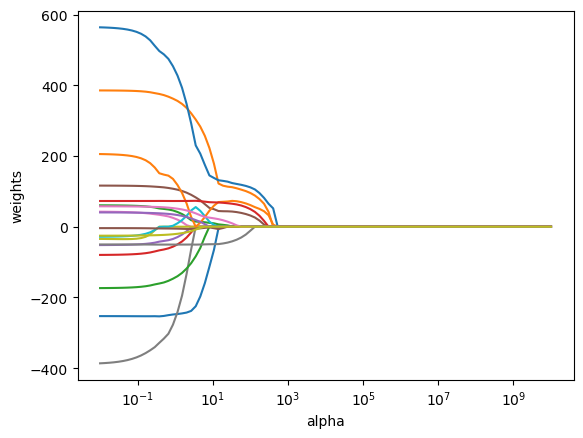

In [60]:
lasso = Lasso()
lambdas = 10**np.linspace(10, -2, 100)*0.5
coefficients = []

for i in lambdas:
    lasso.set_params(alpha=i)
    lasso.fit(X_train, y_train)
    coefficients.append(lasso.coef_)

ax = plt.gca()
ax.plot(lambdas*2, coefficients)
ax.set_xscale('log')
ax.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [61]:
lasso_model.predict(X_test)

array([ 615.44301007,  702.1598457 , 1002.35541458,  409.10922534,
        396.98944267,  346.40656506,  664.88643766,  448.51533445,
        914.37677226,  634.36502436,  693.1940398 ,  881.13292944,
        239.41443826,  441.64576551,  265.04236304,  508.15235909,
        809.7825766 ,   41.03778193, 1245.53883313,  318.43629109,
        425.62612542,  750.39804945,  574.58955884,  651.96382196,
        626.13912653,  201.12725118,  887.05521975,  257.29916759,
        435.61512973,   77.82957531,  142.34562634,  126.30822717,
        366.34110377,  457.33812789,  274.20676378,  263.76160377,
       1316.90011265,  103.7039259 ,  132.5916111 ,  243.35180347,
         51.77767735,  298.64796841,  588.53557299,  400.8949408 ,
        768.77280531,  688.38408248,  358.75909012,  249.50342023,
        250.05191309,  667.1290185 ,  765.69390921,  316.84265948,
        760.68260621,  188.46579301,  285.49712529,  597.22165762,
        667.19993072,  810.44789712,  160.85646206, 1175.07203

In [62]:
y_pred = lasso_model.predict(X_test)

In [63]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred))

356.85763359502283

In [64]:
from sklearn.linear_model import LassoCV

In [65]:
lasso_cv_model = LassoCV(alphas=None, 
                         cv=10,
                         max_iter=10000).fit(X_train, y_train)

In [66]:
lasso_cv_model.alpha_

5.249655713016153

In [71]:
lasso_tuned = Lasso(alpha=lasso_cv_model.alpha_).fit(X_train, y_train)

In [72]:
y_pred_tuned = lasso_tuned.predict(X_test)

In [73]:
np.sqrt(mean_squared_error(y_test, y_pred_tuned))

377.9121283350524